# HATE SPEECH DETECTION 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Bullying/Cyber"

/content/drive/MyDrive/Bullying/Cyber


In [3]:
!pwd

/content/drive/MyDrive/Bullying/Cyber


# Import Libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Data Loading

In [5]:
df_twitter=pd.read_csv("input/train.csv")

***Preliminary Analysis***

In [6]:
df_twitter.shape

(31962, 3)

In [7]:
df_twitter.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


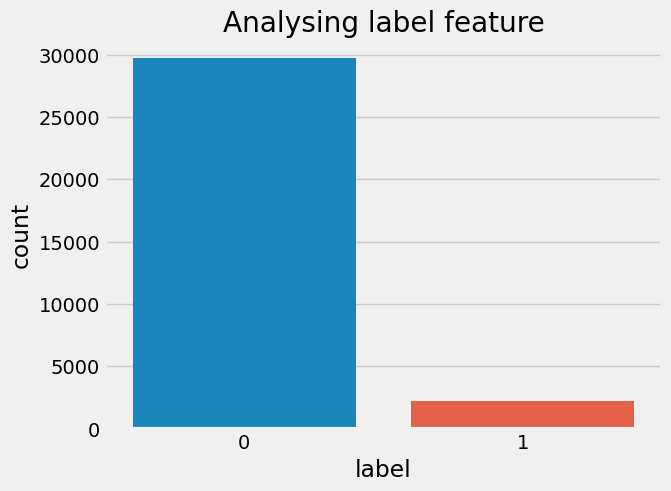

In [8]:
with plt.style.context(style="fivethirtyeight"):
    sns.countplot(x='label',data=df_twitter)
    plt.title(label='Analysing label feature')
    plt.show()

In [9]:
df_twitter.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [10]:
df_twitter.drop('id',axis=1,inplace=True)

In [11]:
df_offensive=pd.read_csv("input/data.csv")

In [12]:
df_offensive.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [13]:
df_offensive.shape

(24783, 7)

In [14]:
df_offensive.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [15]:
df_offensive.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [16]:
df_offensive.head(10)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,1,""" &amp; you might not get ya bitch back &amp; ..."
9,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [17]:
df_offensive['class'].unique()

array([2, 1, 0])

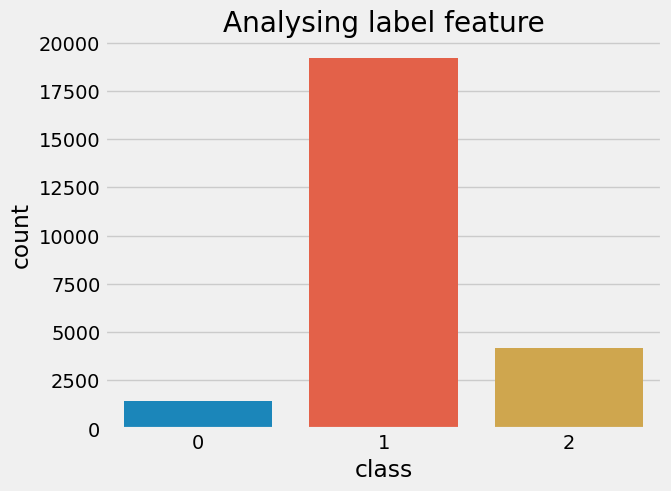

In [18]:
with plt.style.context(style="fivethirtyeight"):
    sns.countplot(x='class',data=df_offensive)
    plt.title(label='Analysing label feature')
    plt.show()

In [19]:
df_offensive[df_offensive['class']==0]['class']=1

In [20]:
df_offensive.head(5)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [21]:
df_offensive['class'].unique()

array([2, 1, 0])

In [22]:
df_offensive[df_offensive['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [23]:
df_offensive["class"].replace({0: 1}, inplace=True)

In [24]:
df_offensive['class'].unique()

array([2, 1])

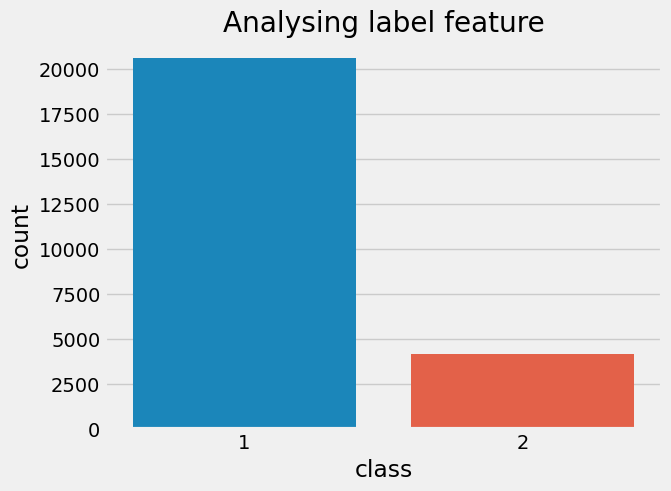

In [25]:
with plt.style.context(style="fivethirtyeight"):
    sns.countplot(x='class',data=df_offensive)
    plt.title(label='Analysing label feature')
    plt.show()

In [26]:
df_offensive["class"].replace({2: 0}, inplace=True)

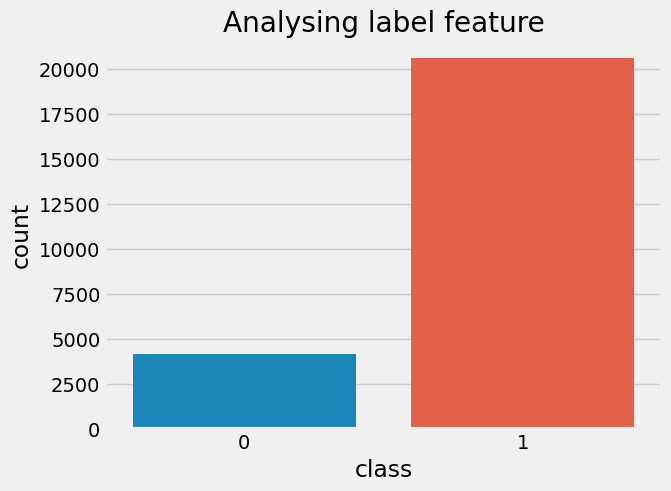

In [27]:
with plt.style.context(style="fivethirtyeight"):
    sns.countplot(x='class',data=df_offensive)
    plt.title(label='Analysing label feature')
    plt.show()

In [28]:
df_offensive.rename(columns ={'class':'label'}, inplace = True)

In [29]:
df_offensive.head(10)

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,1,""" &amp; you might not get ya bitch back &amp; ..."
9,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [30]:
df_offensive.iloc[5]['tweet']

'!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"'

In [31]:
frame=[df_twitter,df_offensive]
df = pd.concat(frame)

In [32]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


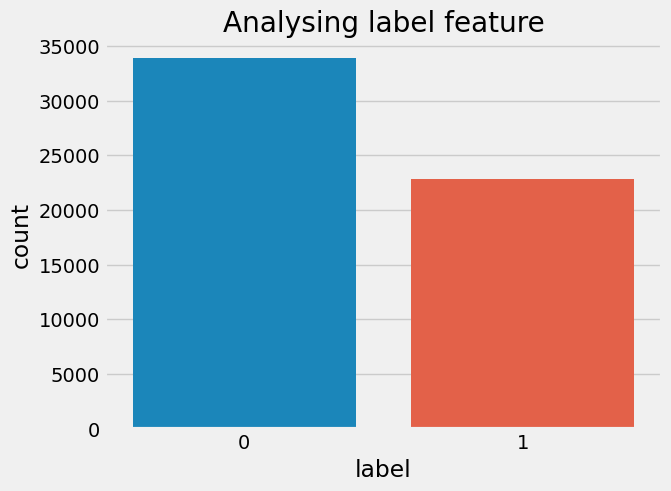

In [33]:
with plt.style.context(style="fivethirtyeight"):
    sns.countplot(x='label',data=df)
    plt.title(label='Analysing label feature')
    plt.show()

In [34]:
df.shape

(56745, 2)

In [35]:
df.to_csv("bullying_data.csv",index=False)

# NLP Processing

In [36]:
import re
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [38]:
df['tweet']=df['tweet'].apply(clean_text)

In [39]:
df.head()

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunc...
1,0,user user thank lyft credit cant use caus dont...
2,0,bihday majesti
3,0,model love u take u time urð± ððð...
4,0,factsguid societi motiv


In [40]:
x=df['tweet']
y=df['label']

In [41]:
# splitting the data into train and test

df_train, df_test = train_test_split(df, test_size = 0.25, random_state = 0)

# checking the shape 
print("Shape of train:", df_train.shape)
print("Shape of test: ", df_test.shape)

Shape of train: (42558, 2)
Shape of test:  (14187, 2)


In [42]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

cv = CountVectorizer(max_features = 10000, ngram_range = (1, 1))
cv.fit(df['tweet'])

df_train_features = cv.transform(df_train['tweet'])
df_test_features = cv.transform(df_test['tweet'])

print("df_train_features :", df_train_features.shape)
print("df_test_features :", df_test_features.shape)

df_train_features : (42558, 10000)
df_test_features : (14187, 10000)


### Algorithm-1: ArtificialNeuralNetwork

In [43]:
import keras 
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [44]:
y_train = df_train['label']
y_test = df_test['label']

# Model Structure
model = tensorflow.keras.models.Sequential()

model.add(tensorflow.keras.layers.Dense(128, input_shape=(10000,)))
model.add(tensorflow.keras.layers.Activation('relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))

model.add(tensorflow.keras.layers.Dense(256))
model.add(tensorflow.keras.layers.Activation('relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))

model.add(tensorflow.keras.layers.Dense(256))
model.add(tensorflow.keras.layers.Activation('relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))

model.add(tensorflow.keras.layers.Dense(512, activation = 'relu'))
model.add(tensorflow.keras.layers.Dense(1, activation = 'sigmoid'))

#  Model compile
model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280128   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               6

In [46]:
# 4. Train model
hist = model.fit(df_train_features.toarray(), y_train.to_numpy(), epochs=10, batch_size=64)

Epoch 1/10
665/665 [==============================] - 12s 7ms/step - loss: 0.2124 - accuracy: 0.9213
Epoch 2/10
665/665 [==============================] - 6s 9ms/step - loss: 0.1523 - accuracy: 0.9499
Epoch 3/10
665/665 [==============================] - 5s 7ms/step - loss: 0.1358 - accuracy: 0.9587
Epoch 4/10
665/665 [==============================] - 6s 8ms/step - loss: 0.1244 - accuracy: 0.9626
Epoch 5/10
665/665 [==============================] - 6s 9ms/step - loss: 0.1158 - accuracy: 0.9665
Epoch 6/10
665/665 [==============================] - 5s 8ms/step - loss: 0.1074 - accuracy: 0.9694
Epoch 7/10
665/665 [==============================] - 7s 11ms/step - loss: 0.0999 - accuracy: 0.9725
Epoch 8/10
665/665 [==============================] - 7s 10ms/step - loss: 0.0943 - accuracy: 0.9744
Epoch 9/10
665/665 [==============================] - 7s 10ms/step - loss: 0.0892 - accuracy: 0.9765
Epoch 10/10
665/665 [==============================] - 5s 7ms/step - loss: 0.0831 - accuracy: 0.

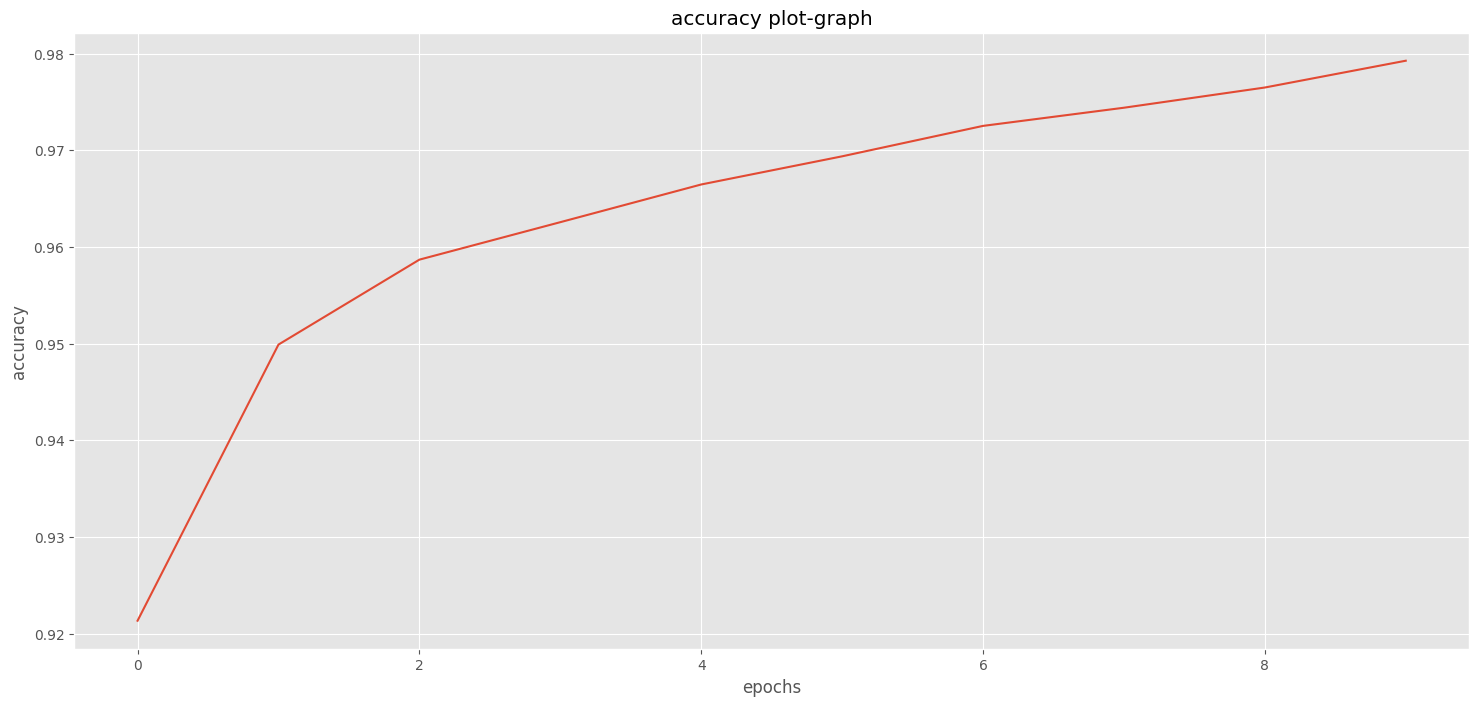

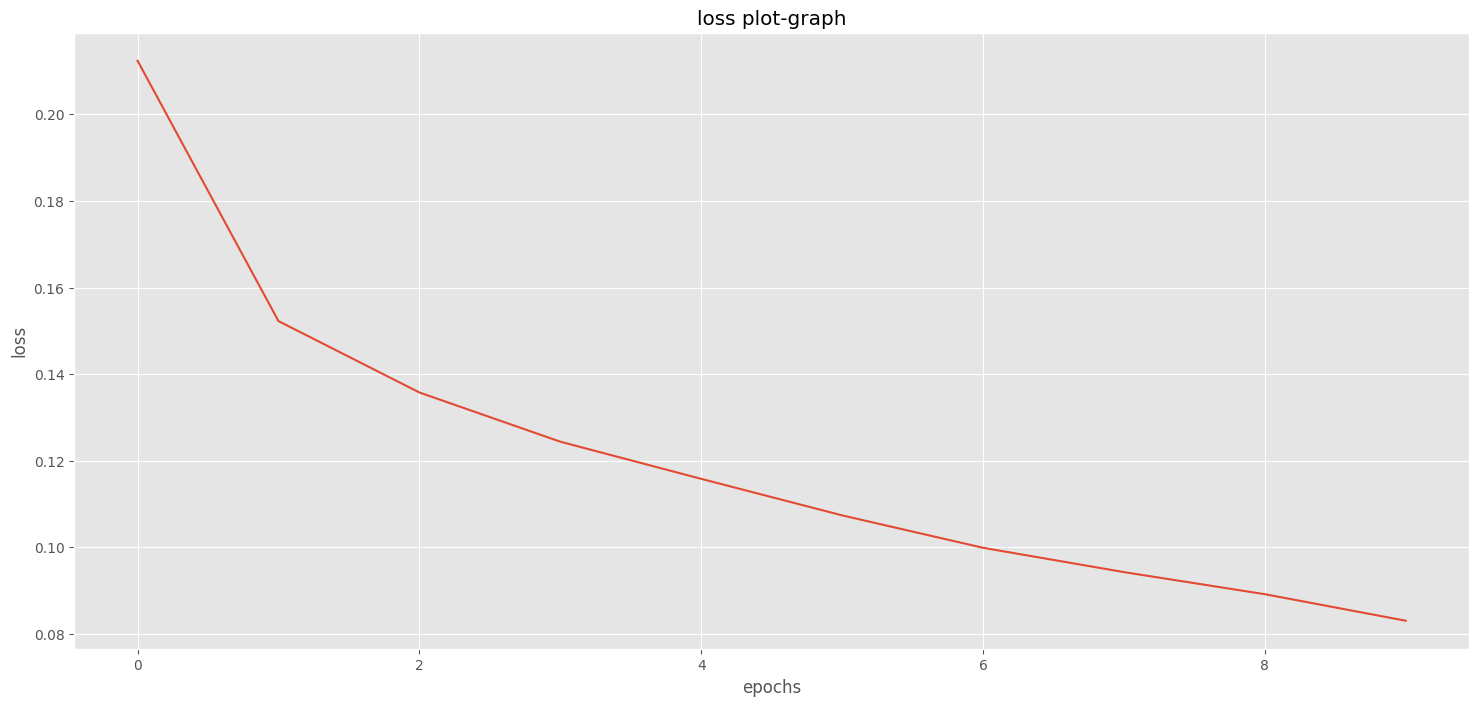

In [47]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(18,8))
    plt.plot(hist.history['accuracy'], label='accuracy')
    plt.title(label="accuracy plot-graph")
    plt.xlabel(xlabel="epochs")
    plt.ylabel(ylabel="accuracy")
    plt.show()

    plt.figure(figsize=(18,8))
    plt.plot(hist.history['loss'], label='loss')
    plt.title(label="loss plot-graph")
    plt.xlabel(xlabel="epochs")
    plt.ylabel(ylabel="loss")
    plt.show()

In [48]:
sub_preds_deep = model.predict(df_test_features.toarray(),batch_size=32,verbose=1)

444/444 [==============================] - 2s 4ms/step


In [49]:
print(sub_preds_deep)

[[0.00546627]
 [0.9996357 ]
 [0.9983198 ]
 ...
 [0.00230187]
 [0.9996966 ]
 [0.99924195]]


In [50]:
y_pred=[1 if i>0.5 else 0 for i in sub_preds_deep]

In [51]:
print(y_pred)

[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 

In [52]:
y_true=df_test["label"].to_numpy()

In [53]:
print(y_true)

[0 1 1 ... 0 1 1]


### Result Analysis

***Accuracy Score***

In [54]:
model_accuracy=accuracy_score(y_true,y_pred)
print("validated accuracy of the model is {:.2f}%".format(model_accuracy*100.0))

validated accuracy of the model is 94.08%


***Classification Report***

In [55]:
print(classification_report(y_true,y_pred,target_names=["Normal","Bullying"]))

              precision    recall  f1-score   support

      Normal       0.95      0.95      0.95      8403
    Bullying       0.92      0.93      0.93      5784

    accuracy                           0.94     14187
   macro avg       0.94      0.94      0.94     14187
weighted avg       0.94      0.94      0.94     14187



***Confusion Matrix***

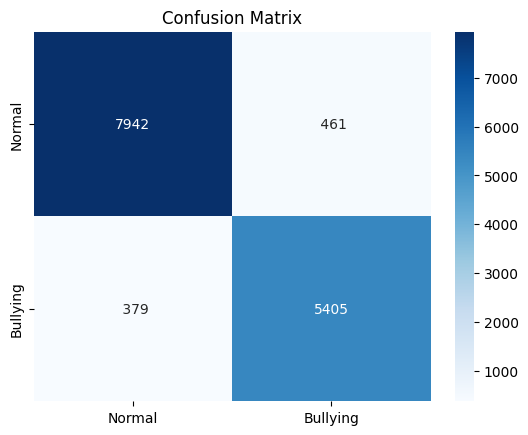

In [56]:
import seaborn as sns
ax=sns.heatmap(data=confusion_matrix(y_true,y_pred),
              xticklabels=["Normal","Bullying"],
              yticklabels=["Normal","Bullying"],
               annot=True,
               fmt='4d',
              cmap=plt.cm.Blues)
plt.title(label="Confusion Matrix")
plt.show()

### Model Saving

In [57]:
model.save("model/ArtificialNeuralNetwork.h5")

### Algorithm-2 : GaussianNaiveBayes

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(df_train_features.toarray(), df_train['label'].to_numpy())

GaussianNB()

In [59]:
y_pred = gnb.predict(df_test_features.toarray())

In [60]:
print(y_pred)

[0 1 1 ... 0 1 0]


### Result Analysis

***Accuracy Score***

In [61]:
gnb_accuracy=accuracy_score(df_test['label'].to_numpy(),y_pred)
print("validated accuracy of the gnb model is {:.2f}%".format(gnb_accuracy*100.0))

validated accuracy of the gnb model is 67.13%


***Classification Report***

In [62]:
print(classification_report(df_test['label'].to_numpy(),y_pred,target_names=["Normal","Bullying"]))

              precision    recall  f1-score   support

      Normal       0.91      0.49      0.64      8403
    Bullying       0.56      0.93      0.70      5784

    accuracy                           0.67     14187
   macro avg       0.74      0.71      0.67     14187
weighted avg       0.77      0.67      0.66     14187



***Confusion Matrix***

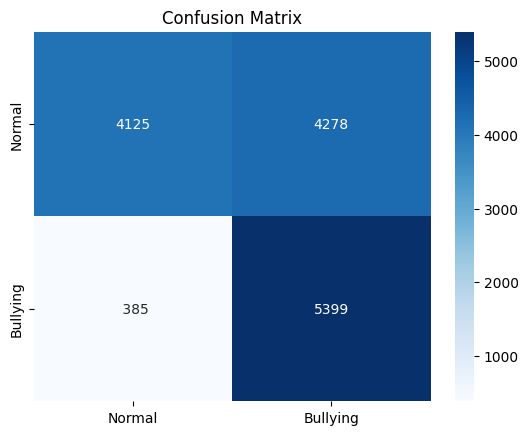

In [63]:
import seaborn as sns
ax=sns.heatmap(data=confusion_matrix(df_test['label'].to_numpy(),y_pred),
              xticklabels=["Normal","Bullying"],
              yticklabels=["Normal","Bullying"],
               annot=True,
               fmt='4d',
              cmap=plt.cm.Blues)
plt.title(label="Confusion Matrix")
plt.show()

In [64]:
import pickle
with open(file="model/GaussianNaiveBayes_model.pkl",mode="wb") as file:
    pickle.dump(obj=gnb,file=file)

## Thank You